# A Standard Virus Load Function

Here we consider a virus load function with three main phases given by

$$V(t)=v_1(t)v_2(t)v_3(t),$$

where $v _1$ describes the initial growth phase between $a _1$ and $a _2$ , $v _2$ the intermediate slow decay
phase between $a _2$ and $b _1$, and $v _3$ the final decay phase between $b _1$ and $b _2$. These functions are given as sigmoid and exponential functions, respectively

$$
\begin{aligned}
v_1(t) & = 1 + \frac{\max - 1}{2} \left[ \tanh \left( \frac{6}{a_2 - a_1} \left( t - \frac{a_1 + a_2}{2} \right) - \tanh  \left( -3\frac{a_2 + a_1}{a_2 - a_1} \right) \right) \right] \\
v_2(t) & = (1 - H(t - a_2)) + H(t - a_2)e^{-\alpha(t - a_2)} \\
v_3(t) & = 1 - \frac{1 - \min}{2} \left[ \tanh \left( \frac{6}{b_2 - b_1} \left( t - \frac{b_1 + b_2}{2} \right) - \tanh  \left( -3\frac{b_2 + b_1}{b_2 - b_1} \right) \right) \right],
\end{aligned}
$$

where $H(t)$ denotes the Heaviside function.



A typical virus load curve is shown bellow with the corresponding times. 

![VirusLoadCurves](figures/notebooks/VirusLoadCurves.png)



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [67]:
def VirusLoad(t, a1, a2, b1, b2, alpha, minv, maxv):
    def v1(t, a1, a2, maxv):
        return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
    
    def v2(t, a1, a2, alpha):
        return 1. - np.heaviside(t - a2, 0.5) + np.heaviside(t - a2, 0.5)*np.exp(-alpha*(t - a2))
    
    def v3(t, b1, b2, minv):
        return 1. - (1. - minv)*(np.tanh(6.*(t - (b1 + b2)/2)/(b2 - b1)) - np.tanh(-3.*(b2 + b1)/(b2 - b1)))/2.
    
    return v1(t, a1, a2, maxv)*v2(t, a1, a2, alpha)*v3(t, b1, b2, minv)

In [90]:
xdata = np.linspace(0, 22, 100)
y = VirusLoad(xdata, 0.5, 4., 13., 19., 0.1, 1e-6, 1e6)
np.random.seed(1729)
y_noise = 1e4 * np.random.normal(size=xdata.size)
ydata = y + y_noise

popt1, pcov2 = curve_fit(VirusLoad, xdata, ydata)
print(popt1)

popt2, pcov2 = curve_fit(VirusLoad, xdata, ydata, bounds=(0, [2., 5., 20., 22., 0.2, 1e-5, 1e+6]))
print(popt2)

[  -0.29323834   67.17043546    1.            1.         -261.19255758
   83.03020105   77.68028961]
[4.98558864e-01 3.99937827e+00 1.31213652e+01 1.89205475e+01
 9.91031351e-02 5.90775765e-12 9.95347387e+05]


<ipython-input-67-95ca70dae652>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
<ipython-input-67-95ca70dae652>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
<ipython-input-67-95ca70dae652>:9: RuntimeWarning: divide by zero encountered in true_divide
  return 1. - (1. - minv)*(np.tanh(6.*(t - (b1 + b2)/2)/(b2 - b1)) - np.tanh(-3.*(b2 + b1)/(b2 - b1)))/2.
<ipython-input-67-95ca70dae652>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. - (1. - minv)*(np.tanh(6.*(t - (b1 + b2)/2)/(b2 - b1)) - np.tanh(-3.*(b2 + b1)/(b2 - b1)))/2.
/home/shigoto/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

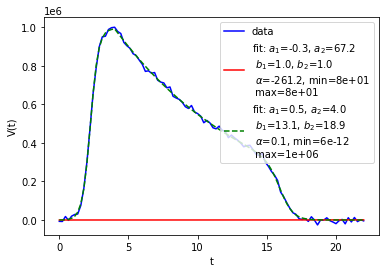

In [91]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, VirusLoad(xdata, *popt1), 'r-',
         label='fit: $a_1$=%2.1f, $a_2$=%2.1f\n $b_1$=%2.1f, $b_2$=%2.1f\n $\\alpha$=%2.1f, min=%1.0e\n max=%1.0e' % tuple(popt1))
plt.plot(xdata, VirusLoad(xdata, *popt2), 'g--',
         label='fit: $a_1$=%2.1f, $a_2$=%2.1f\n $b_1$=%2.1f, $b_2$=%2.1f\n $\\alpha$=%2.1f, min=%1.0e\n max=%1.0e' % tuple(popt2))

plt.xlabel('t')
plt.ylabel('V(t)')
plt.legend()
plt.show()